In [42]:
# Import Libraries
require 'daru'
require 'numo/linalg/autoloader'
require 'rumale'
require 'numo/gnuplot'

false

In [43]:
# Import Dataset
df = Daru::DataFrame.from_csv('salary_data.csv')

# Convert dataset to Numo::NArray dataset
data = Numo::DFloat.cast df['YearsExperience', 'Salary'].to_a[0].map { |data| data.values }

Numo::DFloat#shape=[30,2]
[[1.1, 39343], 
 [1.3, 46205], 
 [1.5, 37731], 
 [2, 43525], 
 [2.2, 39891], 
 [2.9, 56642], 
 [3, 60150], 
 [3.2, 54445], 
 [3.2, 64445], 
 [3.7, 57189], 
 [3.9, 63218], 
 [4, 55794], 
 [4, 56957], 
 [4.1, 57081], 
 [4.5, 61111], 
 [4.9, 67938], 
 [5.1, 66029], 
 [5.3, 83088], 
 [5.9, 81363], 
 [6, 93940], 
 ...

In [44]:
# Split dataset into Training and Test set
x_train, y_train, x_test, y_test = nil
Rumale::ModelSelection::ShuffleSplit.new(test_size: 0.3, n_splits: 1, random_seed: 1).split(data).each do |train, test|
  x_train, y_train = data[train, true][true, 0..-2], data[train, true][true, 1..-1]
  x_test, y_test = data[test, true][true, 0..-2], data[test, true][true, 1..-1]
end

[[[1, 2, 3, 4, 7, 8, 10, 13, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29], [5, 12, 14, 9, 11, 16, 6, 22, 0]]]

In [45]:
# Fit traning set data and predict test set results
model = Rumale::LinearModel::LinearRegression.new(solver: 'svd')
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

Numo::DFloat#shape=[9,1]
[[54293.8], 
 [64630], 
 [69328.2], 
 [61811], 
 [64630], 
 [74966.2], 
 [55233.5], 
 [101276], 
 [37380.1]]

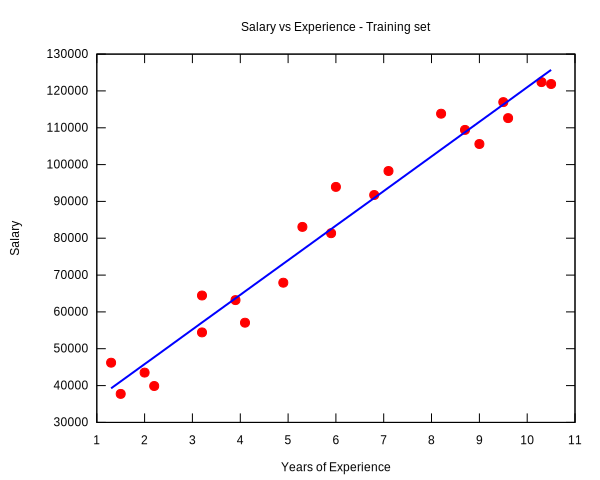

In [46]:
# Visualize training set results
Numo.noteplot do
  set title: 'Salary vs Experience - Training set'
  set xlabel: 'Years of Experience'
  set ylabel: 'Salary'
  plot [x_train, y_train, notitle: true, with: 'points', pt: 7, lt: { rgb: 'red' }],
       [x_train, model.predict(x_train), notitle: true, w:'lines', lt: { rgb: 'blue', lw: 2 }]
end

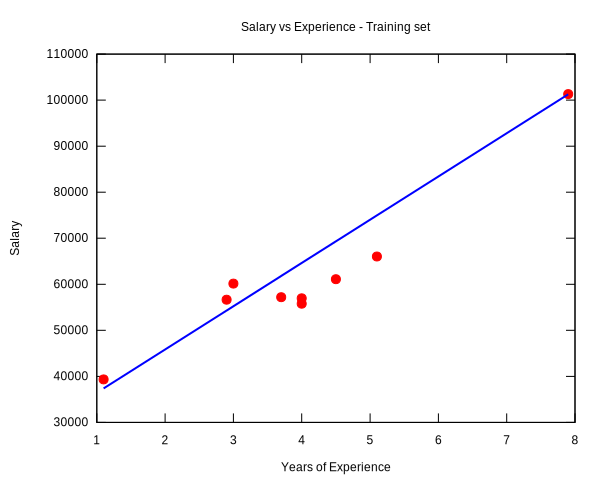

In [41]:
# Visualize test set results
Numo.noteplot do
  set title: 'Salary vs Experience - Training set'
  set xlabel: 'Years of Experience'
  set ylabel: 'Salary'
  plot [x_test, y_test, notitle: true, with: 'points', pt: 7, lt: { rgb: 'red' }],
       [x_test, y_pred, notitle: true, w:'lines', lt: { rgb: 'blue', lw: 2 }]
end

In [47]:
# Predict salaries for years of experience - 10, 12
model.predict([[10],[12]])

Numo::DFloat#shape=[2,1]
[[121009], 
 [139802]]